In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
sherlock = niidb.FMriActivationsDb('data/sherlock.db')

In [5]:
dtfa = DTFA.DeepTFA(sherlock.all(), mask='/data/eli/sherlock/movie_files/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/22/2018 15:18:18 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s4.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:18:32 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:18:46 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:19:00 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:19:13 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:19:27 Loading Nifti image /home/eli/Documents/sh

In [6]:
dtfa.load_state('data/sherlock_k100_n700_06172018_110624')

This next cell works around an apparent bug in PyTorch, due to which the per-block weight distributions weren't being loaded properly.

In [7]:
import torch

guide_state = torch.load('data/sherlock_k100_n700_06172018_110624.dtfa_guide')
dtfa.variational.hyperparams.block__weights__mu.data = guide_state['hyperparams.block__weights__mu']
dtfa.variational.hyperparams.block__weights__sigma.data = guide_state['hyperparams.block__weights__sigma']

In [8]:
def task_labeler(b):
    _, movie, scene = b.task.split('_')
    movie = ''.join([c for c in movie if c.isdigit()])
    scene = ''.join([c for c in scene if c.isdigit()])
    return 'Movie %s, scene %s' % (movie, scene)

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

06/22/2018 15:24:02 Plotting factors for Participant 11, run 2


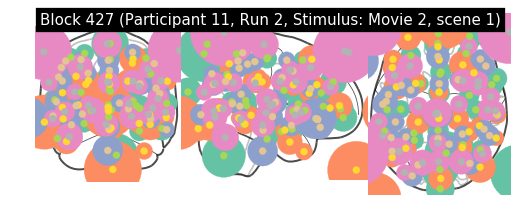

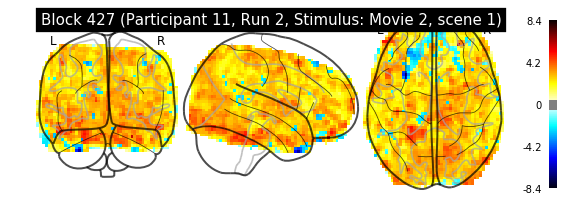

06/22/2018 15:24:07 Reconstruction Error (Frobenius Norm): 1.56969031e+03 out of 1.55769519e+03


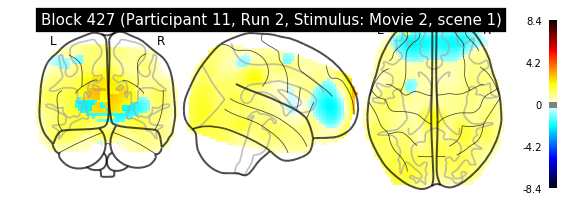

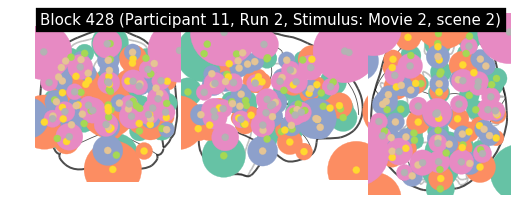

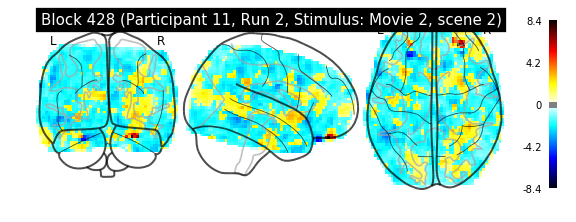

06/22/2018 15:24:16 Reconstruction Error (Frobenius Norm): 1.79532007e+03 out of 1.81214380e+03


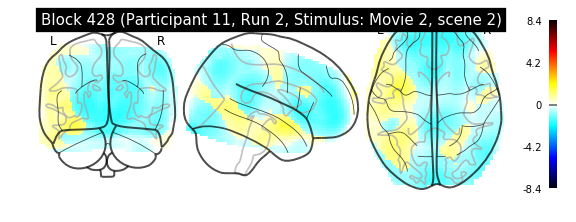

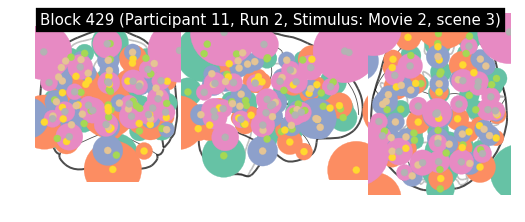

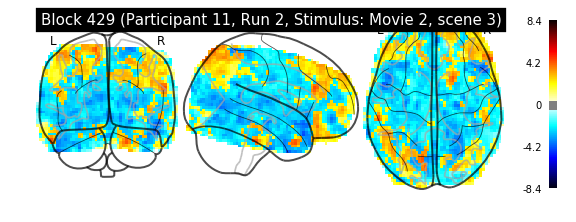

06/22/2018 15:24:25 Reconstruction Error (Frobenius Norm): 2.34370752e+03 out of 2.29391675e+03


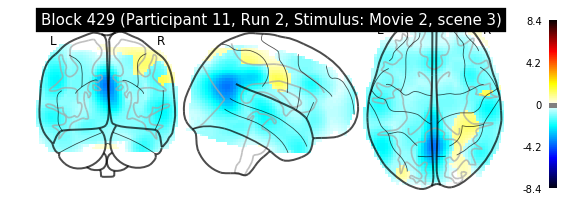

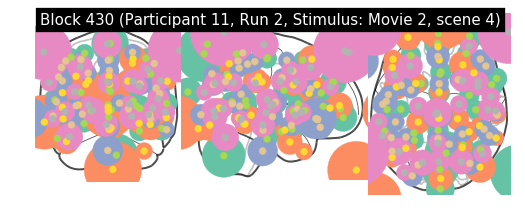

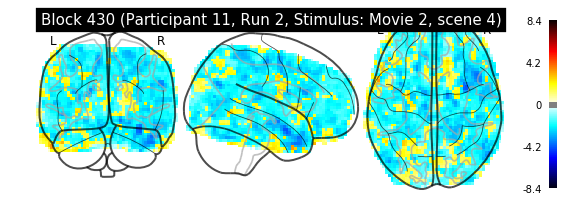

06/22/2018 15:24:31 Reconstruction Error (Frobenius Norm): 1.12854041e+03 out of 1.04204333e+03


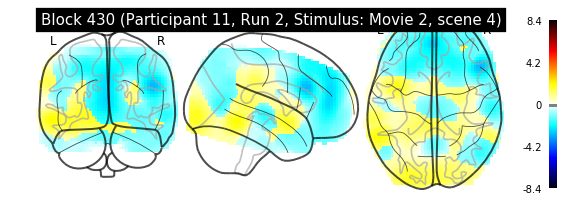

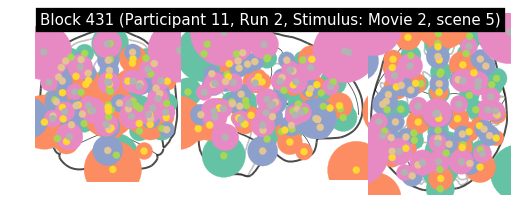

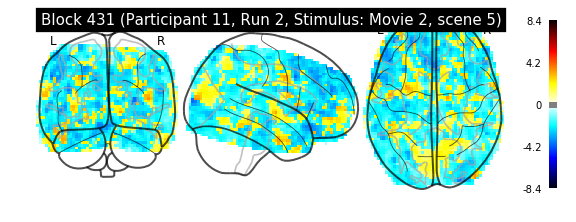

06/22/2018 15:24:41 Reconstruction Error (Frobenius Norm): 1.89472241e+03 out of 1.83678308e+03


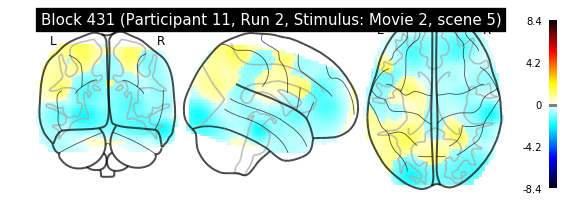

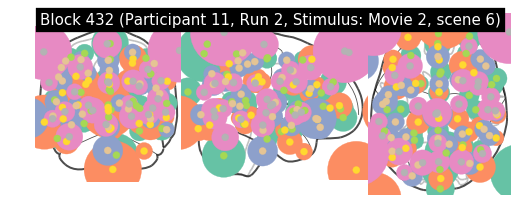

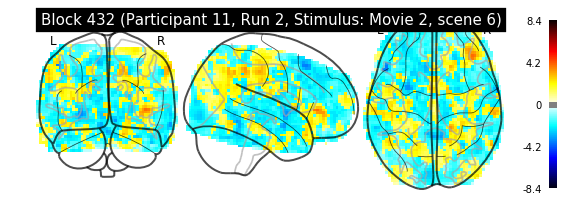

06/22/2018 15:24:55 Reconstruction Error (Frobenius Norm): 2.40010498e+03 out of 2.30476440e+03


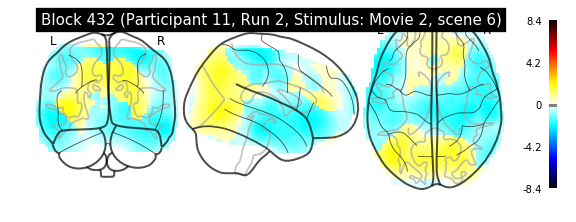

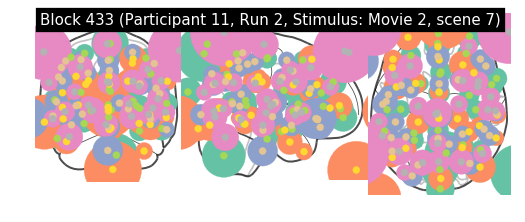

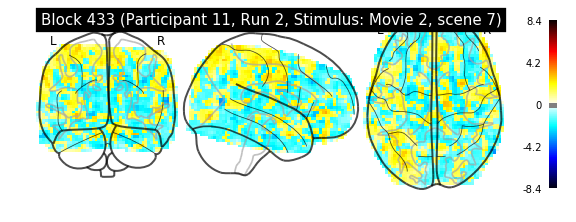

06/22/2018 15:25:04 Reconstruction Error (Frobenius Norm): 1.94160950e+03 out of 1.86662451e+03


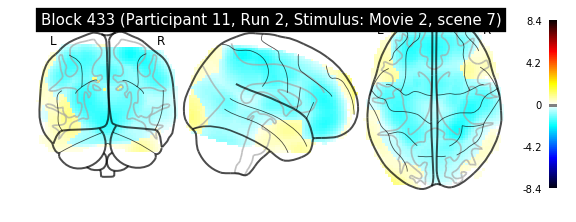

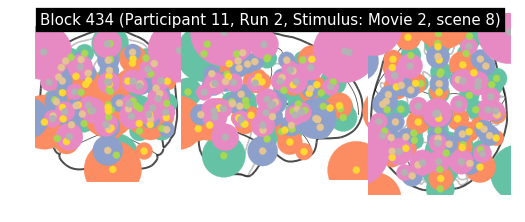

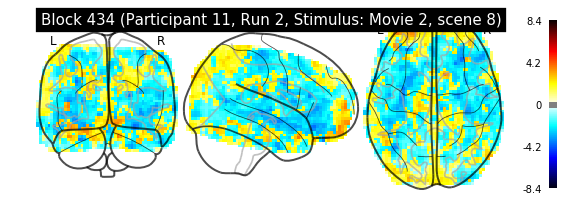

06/22/2018 15:25:16 Reconstruction Error (Frobenius Norm): 2.27795142e+03 out of 2.24157568e+03


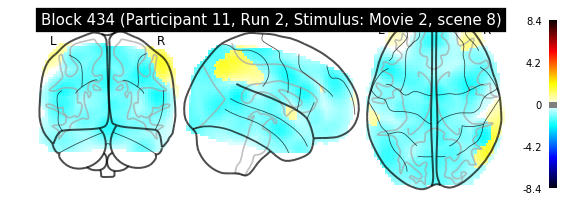

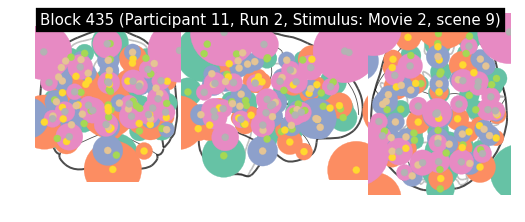

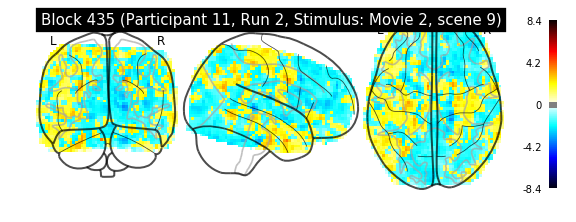

06/22/2018 15:25:28 Reconstruction Error (Frobenius Norm): 2.28815381e+03 out of 2.20621387e+03


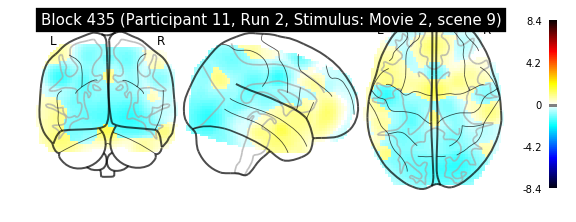

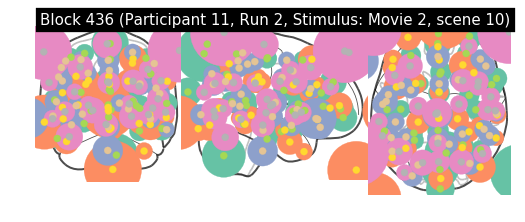

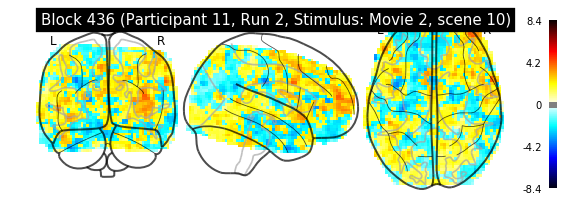

06/22/2018 15:25:34 Reconstruction Error (Frobenius Norm): 1.80265576e+03 out of 1.75540491e+03


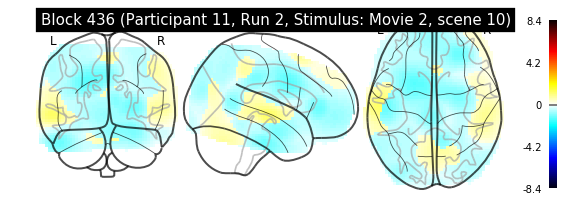

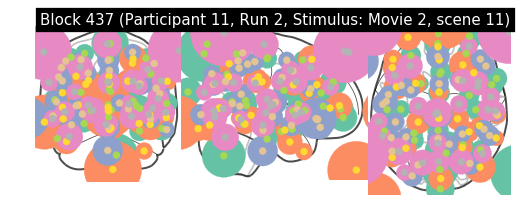

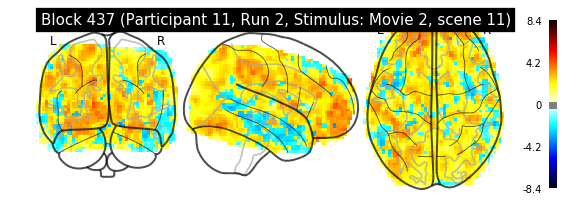

06/22/2018 15:25:50 Reconstruction Error (Frobenius Norm): 2.97741675e+03 out of 2.91582056e+03


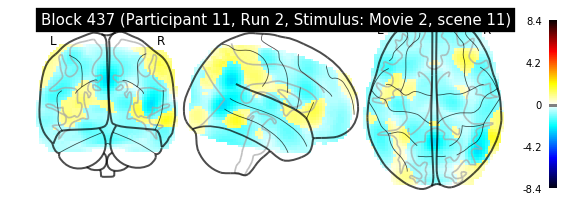

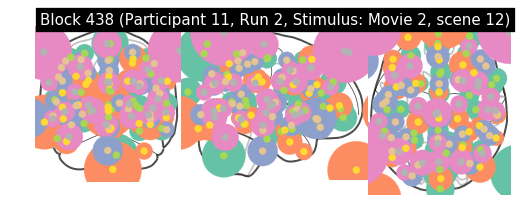

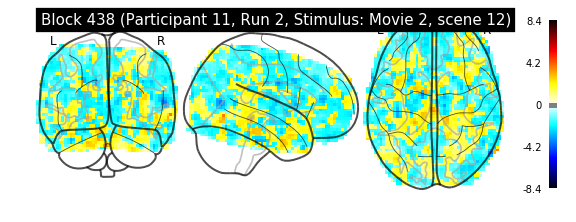

06/22/2018 15:25:57 Reconstruction Error (Frobenius Norm): 1.70622681e+03 out of 1.63669983e+03


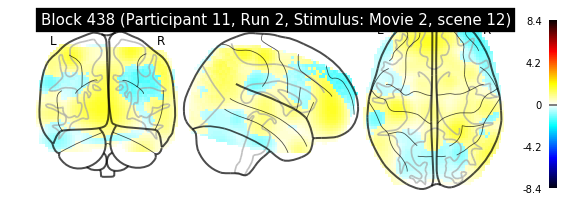

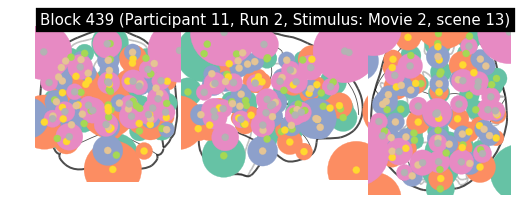

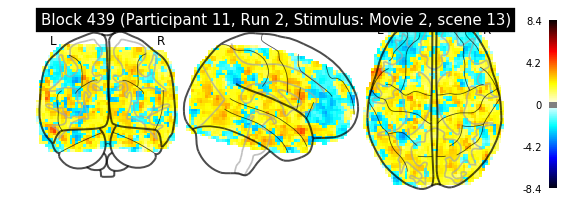

06/22/2018 15:26:06 Reconstruction Error (Frobenius Norm): 1.96101074e+03 out of 1.93721594e+03


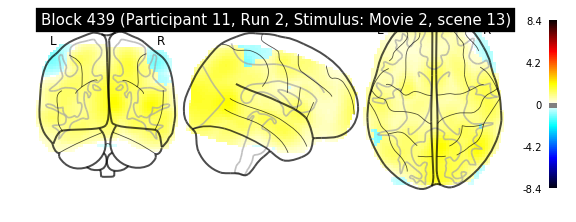

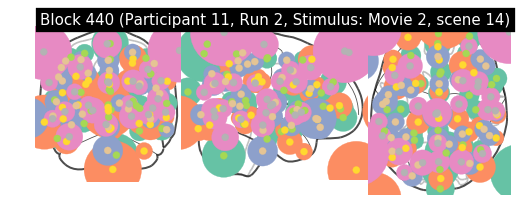

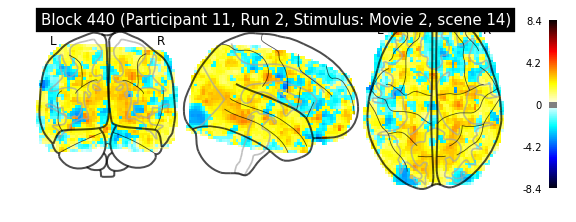

06/22/2018 15:26:12 Reconstruction Error (Frobenius Norm): 1.25936121e+03 out of 1.22104407e+03


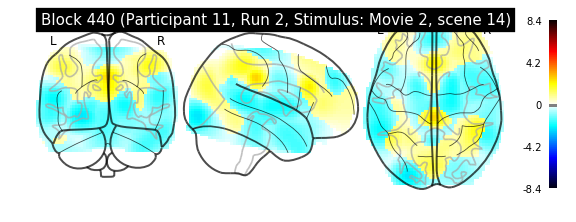

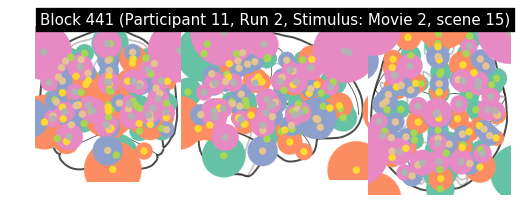

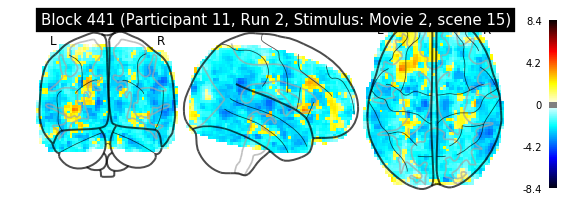

06/22/2018 15:26:16 Reconstruction Error (Frobenius Norm): 9.42565308e+02 out of 9.77284973e+02


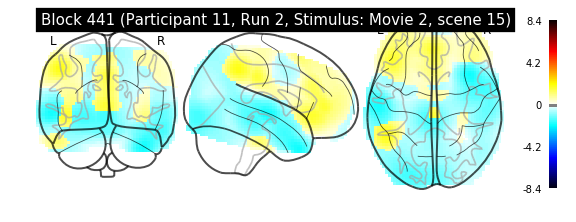

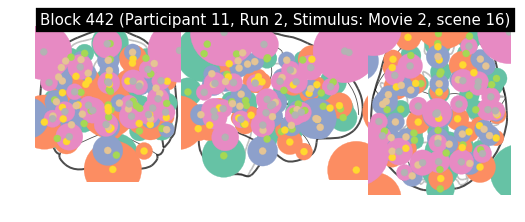

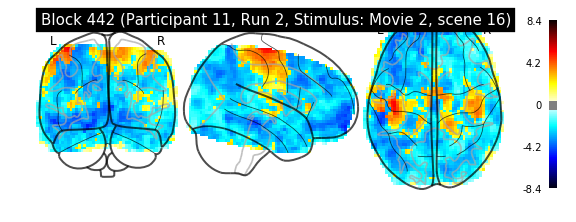

06/22/2018 15:26:23 Reconstruction Error (Frobenius Norm): 1.50814502e+03 out of 1.48175195e+03


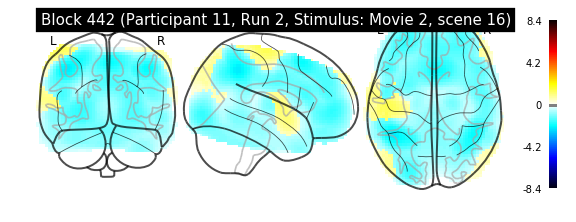

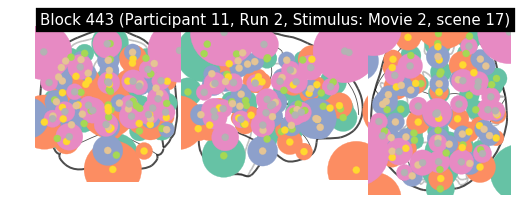

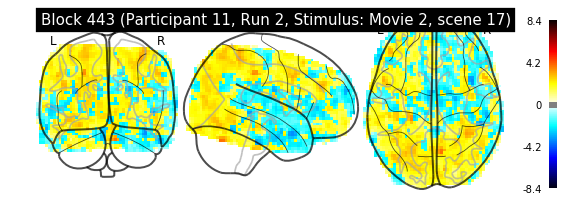

06/22/2018 15:26:30 Reconstruction Error (Frobenius Norm): 1.20430176e+03 out of 1.14377588e+03


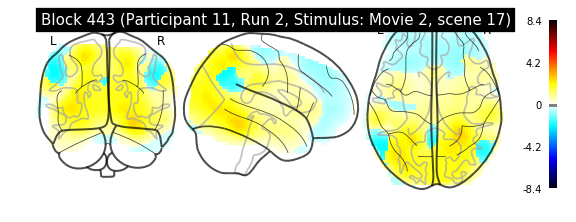

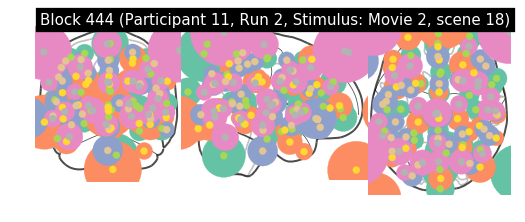

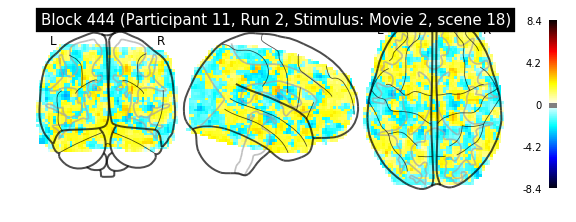

06/22/2018 15:26:39 Reconstruction Error (Frobenius Norm): 1.65623413e+03 out of 1.57774158e+03


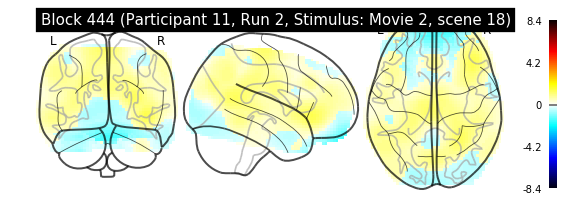

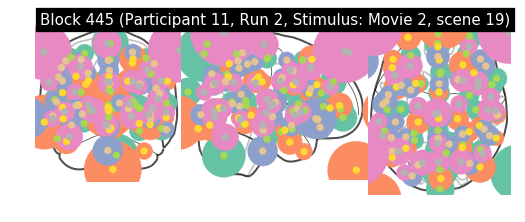

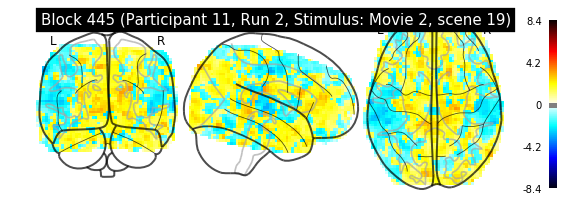

06/22/2018 15:26:45 Reconstruction Error (Frobenius Norm): 1.06542627e+03 out of 1.04741272e+03


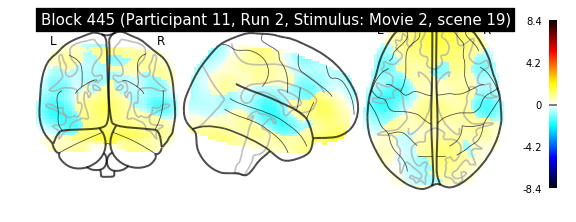

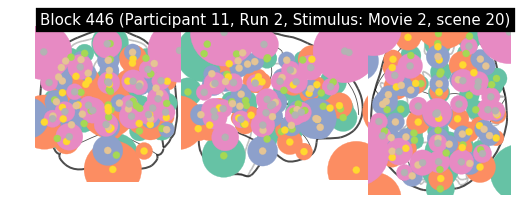

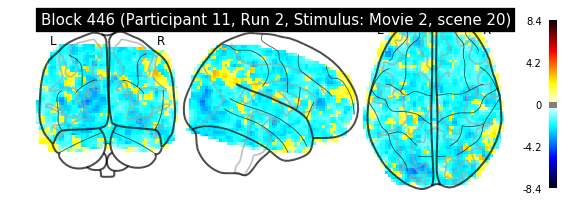

06/22/2018 15:26:53 Reconstruction Error (Frobenius Norm): 1.53021387e+03 out of 1.47741174e+03


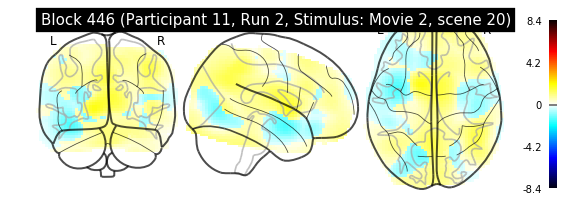

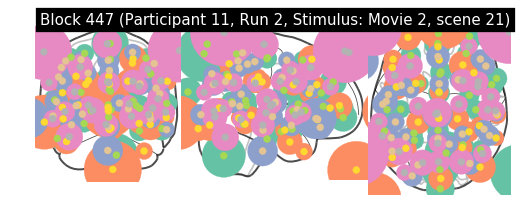

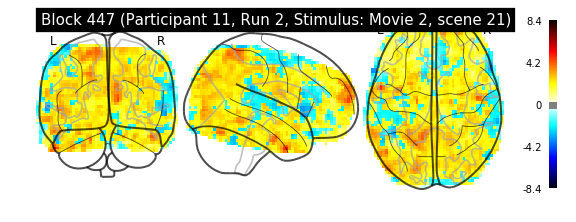

06/22/2018 15:27:03 Reconstruction Error (Frobenius Norm): 2.07322119e+03 out of 2.03356445e+03


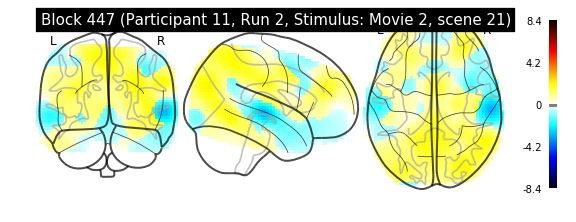

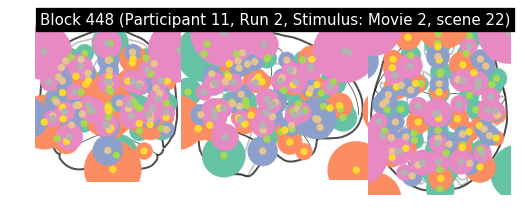

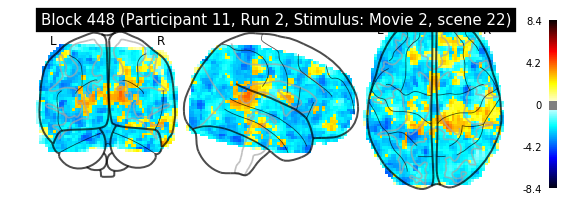

06/22/2018 15:27:10 Reconstruction Error (Frobenius Norm): 2.01536401e+03 out of 2.00008752e+03


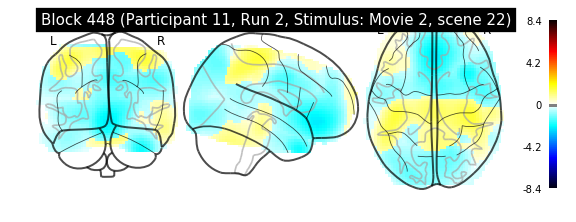

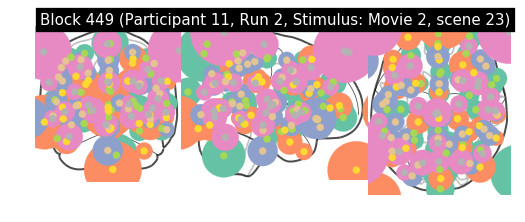

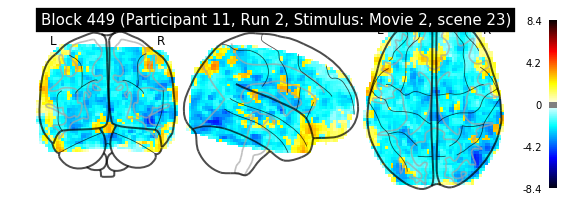

06/22/2018 15:27:17 Reconstruction Error (Frobenius Norm): 1.59752576e+03 out of 1.60202222e+03


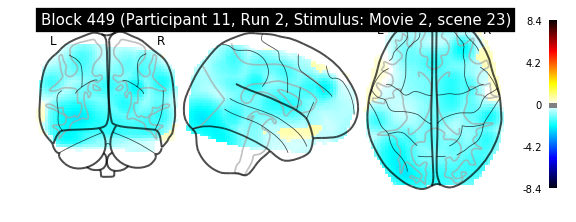

In [9]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


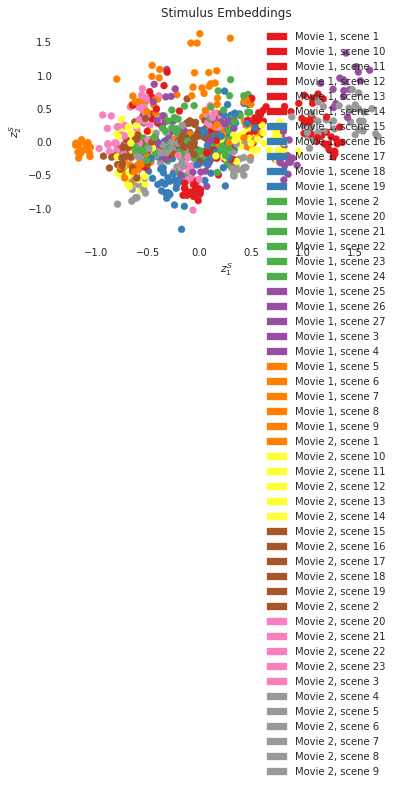

In [10]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [11]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


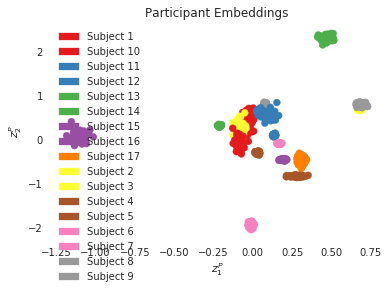

In [12]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [13]:
dtfa.decoding_accuracy()

sherlock_movie2_scene16


/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:363: RuntimeWarning: divide by zero encountered in log
  return 0.5 * (np.log(1 + r) - np.log(1 - r))
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:394: RuntimeWarning: invalid value encountered in add
  isfc_mat[n, :] = isfc_mat[n, :] + vectorize(next_corrs + next_corrs.T)
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:366: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


sherlock_movie1_scene26
sherlock_movie1_scene6
sherlock_movie2_scene3
sherlock_movie1_scene5
sherlock_movie2_scene22
sherlock_movie2_scene4
sherlock_movie2_scene5
sherlock_movie1_scene23
sherlock_movie2_scene9
sherlock_movie2_scene2
sherlock_movie2_scene6
sherlock_movie1_scene12
sherlock_movie1_scene18
sherlock_movie2_scene14
sherlock_movie2_scene19
sherlock_movie1_scene22
sherlock_movie2_scene20
sherlock_movie2_scene10
sherlock_movie1_scene25
sherlock_movie1_scene1
sherlock_movie1_scene10
sherlock_movie1_scene11
sherlock_movie1_scene14
sherlock_movie2_scene7
sherlock_movie1_scene19
sherlock_movie2_scene15
sherlock_movie2_scene18
sherlock_movie2_scene23
sherlock_movie2_scene13
sherlock_movie1_scene20
sherlock_movie1_scene7
sherlock_movie1_scene21
sherlock_movie1_scene17
sherlock_movie2_scene12
sherlock_movie1_scene13
sherlock_movie1_scene27
sherlock_movie1_scene16
sherlock_movie1_scene24
sherlock_movie1_scene2
sherlock_movie2_scene1
sherlock_movie1_scene3
sherlock_movie2_scene17
sherlo

{'sherlock_movie1_scene1': {'isfc': [array([0.        , 0.        , 0.04545455, 0.        , 0.04545455,
          0.        , 0.04545455, 0.        , 0.04545455])],
  'kl': [array([0.13636364, 0.13636364, 0.13636364, 0.04545455, 0.        ,
          0.04545455, 0.        , 0.04545455, 0.        ])],
  'mixed': [array([0.        , 0.        , 0.04545455, 0.        , 0.04545455,
          0.        , 0.04545455, 0.        , 0.04545455])],
  'node': [array([0.31818182, 0.09090909, 0.        , 0.04545455, 0.        ,
          0.04545455, 0.        , 0.04545455, 0.        ])]},
 'sherlock_movie1_scene10': {'isfc': [array([0.        , 0.        , 0.06666667, 0.        , 0.06666667,
          0.        , 0.06666667, 0.        , 0.06666667])],
  'kl': [array([0.2       , 0.13333333, 0.06666667, 0.06666667, 0.13333333,
          0.06666667, 0.06666667, 0.06666667, 0.        ])],
  'mixed': [array([0.        , 0.        , 0.06666667, 0.        , 0.06666667,
          0.        , 0.06666667, 0.

In [14]:
dtfa.voxel_decoding_accuracy()

06/22/2018 15:31:18 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)


sherlock_movie1_scene1


06/22/2018 15:31:32 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:31:46 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:32:00 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:32:13 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:32:27 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s16.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:32:40 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene10


06/22/2018 15:35:11 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:35:24 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:35:37 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:35:51 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:36:05 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:36:18 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene11


06/22/2018 15:39:01 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:39:15 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:39:28 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:39:42 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:39:55 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:40:09 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene12


06/22/2018 15:42:53 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:43:06 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:43:20 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:43:33 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:43:47 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:44:01 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene13


06/22/2018 15:46:52 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:47:10 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:47:27 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:47:44 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:48:01 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:48:18 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene14


06/22/2018 15:51:51 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:52:09 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:52:25 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:52:42 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:52:59 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:53:16 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene15


06/22/2018 15:56:35 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:56:53 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:57:10 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:57:27 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:57:44 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 15:58:02 Loading Nifti image /home/eli/Documents/sh

sherlock_movie1_scene16


06/22/2018 16:01:27 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s13.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 16:01:43 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s17.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 16:02:00 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s12.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 16:02:17 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s8.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 16:02:40 Loading Nifti image /home/eli/Documents/sherlock/movie_files/sherlock_movie_s1.nii with mask /home/eli/Documents/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/22/2018 16:03:02 Loading Nifti image /home/eli/Documents/sh

MemoryError: 